# The Central Limit Theorem
In this exercise we will explore and demonstrate the Central Limit Theorem—a very important idea that arises in much of science and data analysis. The theorem states that the average of a series of numbers will always follow a Gaussian, or "normal," probability distribution regardless of the probability distribution that the data points were drawn from.

A Gaussian probability distribution (or density) function (PDF) is given by 
$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right] $$
where $x_0$ is the mean of the distribution, and $\sigma$ is the standard deviation of the distribution.

Let's first take a look at a gaussian function

In [1]:
# Load in useful packages and make plots display inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

To make life easy, let's first make a function that creates a Gaussian curve

In [2]:
def gauss(sig=1,x0=0):
    x = np.linspace(x0-10*sig,x0+10*sig,1000)
    y = 1.0/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-x0)**2/(2*sig**2))
    return x,y

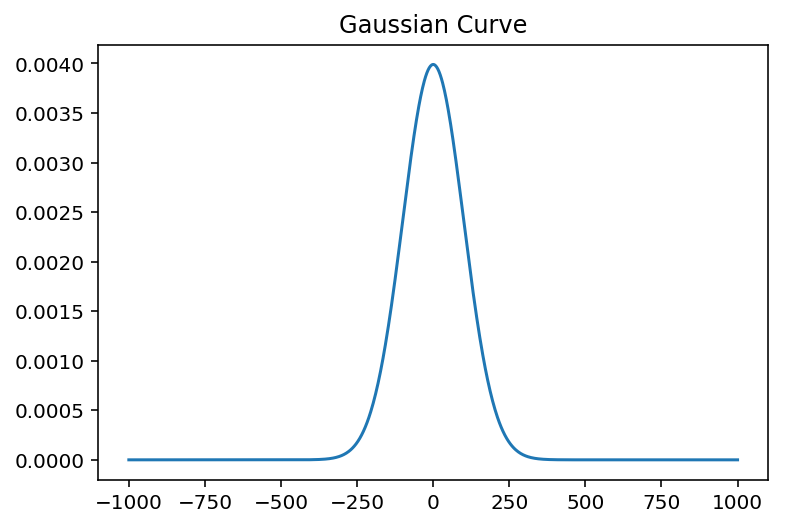

In [4]:
x,y = gauss(sig=100,x0=0)
plt.plot(x,y)
plt.title('Gaussian Curve')

Go ahead and change the mean and standard deviation and see how the curve changes...

Now, what does it mean to say that we "draw" numbers from a normal distribution? It means that numbers are drawn randomly with probability equal to the value of a Gaussian function with a given mean and standard deviation. Luckily, there is a very nice numpy function that will do this for us.

In [5]:
# This draws 100 samples from a normal distribution with a mean of "0" and a standard deviation of "1"
rand = np.random.normal(0,1,100)
print(rand)

[ 1.89414046  0.94271961 -0.04339445 -2.33424516  1.05167269 -1.80095097
  1.71380212 -0.2830989  -1.36172864 -1.14812542 -0.20428059 -1.23429351
  0.49960178 -0.79798053  0.34536899 -0.87849693 -0.12122326 -1.062985
  0.79487299  0.5156513  -1.39872557  0.13377567 -1.00440016  0.79573239
  2.17271724  1.83057665  1.11073929 -0.7682913   1.61031625  1.13589241
 -1.47524363 -0.08642772 -0.40890332 -0.23840424  0.70204242  0.13393856
 -0.82725457  0.28208841  0.10922413  0.39875787 -0.37681615 -0.38420699
 -0.34471599 -0.42872335 -1.63555211 -0.13686566  0.25841559  0.42238016
  0.26977584 -1.73974156 -0.83766738 -0.60834863  0.92227564  0.3706445
 -0.47321566 -2.45335649  0.98380124 -0.05377101 -0.11284185  0.13199783
 -0.31994036 -3.2576341   0.85405763 -1.095279    1.2340471   0.09262617
  0.59702033 -1.76657167 -2.02731328  0.24509837  0.33350499 -0.19956894
  1.07985804 -0.92037707 -0.86185579  1.41648653 -0.89669734  0.38172038
 -0.52091833 -0.2930195   0.01834554  0.33796663  0.12

Hmm. Ok, it's just a bunch of values. But what are the frequency of the values?

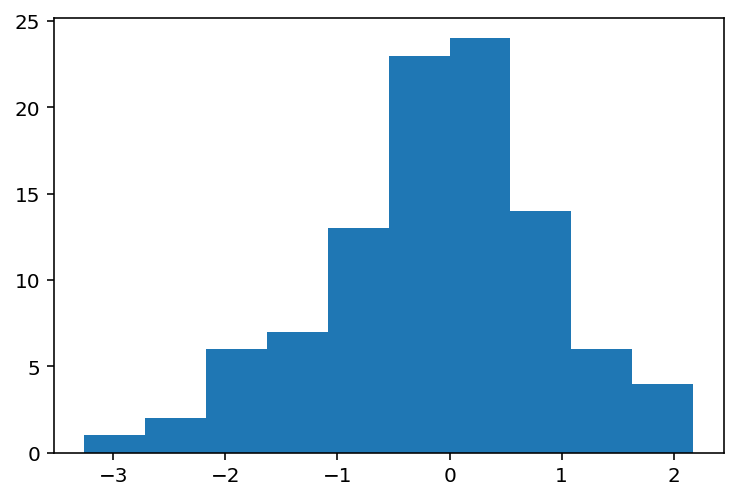

In [13]:
hist = plt.hist(rand)

Interesting! It (sort of) looks like a normal distribution. Why don't you try upping the number of samples drawn to 1000, or more! You can also increase the number of bins in your histogram. 

Next, let's overplot a Gaussian curve with the same mean and standard deviation.

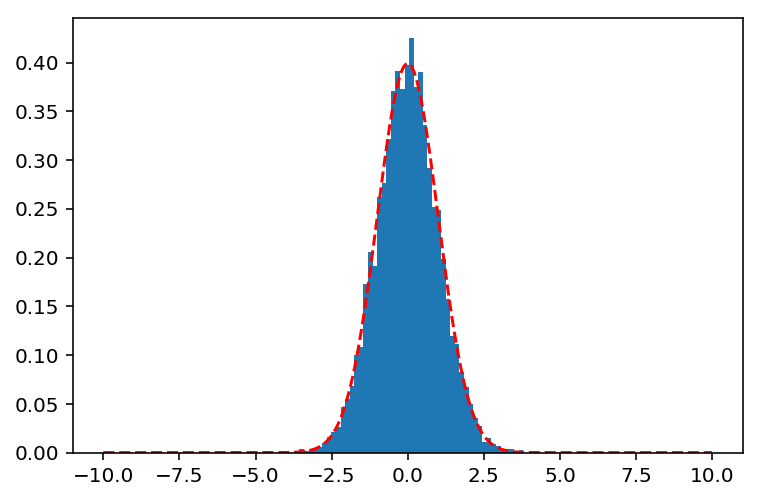

In [14]:
hist = plt.hist(np.random.normal(0,1,10000),bins=50,normed=True,edgecolor='none')
x,y = gauss(sig=1,x0=0)
plt.plot(x,y,'r--')

You can see that it follows the curve very well.

Now let's look at what it looks like to draw a bunch of samples from a different distribution. We'll use a lognormal form. Don't worry if we have not gone over what a lognormal PDF is yet, you can look <a href='https://en.wikipedia.org/wiki/Log-normal_distribution'>here</a> to get some quick info about it, or just take it as fact that it is an asymmetric distribution. 

(1.6487212707001282, 1.6457252077911395)


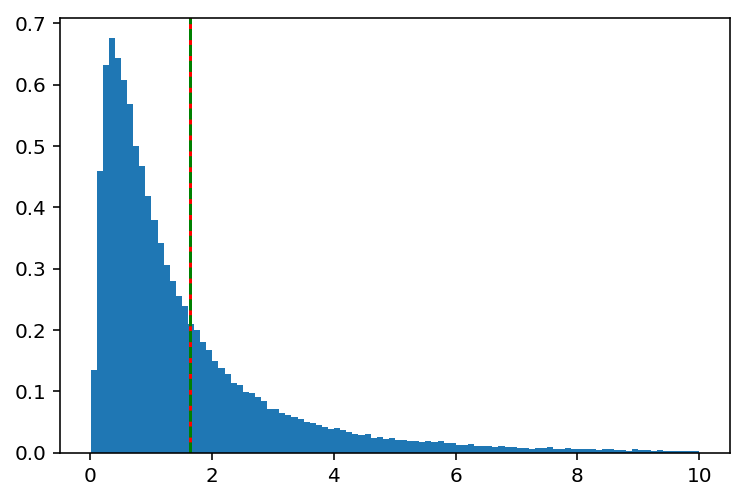

In [15]:
# This line "draws" 100000 samples
dist = np.random.lognormal(0,1,100000)
plt.hist(dist[dist<10],bins=100,normed=True)
# This is what the mean of the distribution should be
plt.axvline(x=np.sqrt(np.e),linestyle='-',color='red')
# This is the actual mean of the distribution
plt.axvline(x=np.mean(dist),linestyle='--',color='green')

print(np.sqrt(np.e),np.mean(dist))

Ok, so, there is a well defined mean. But this sure looks different than a normal distribution.

Now on to the Central Limit Theorem (the point of this whole exercise!). The CLT states that if we average many lognormal distributions that the result should be Gaussian! 

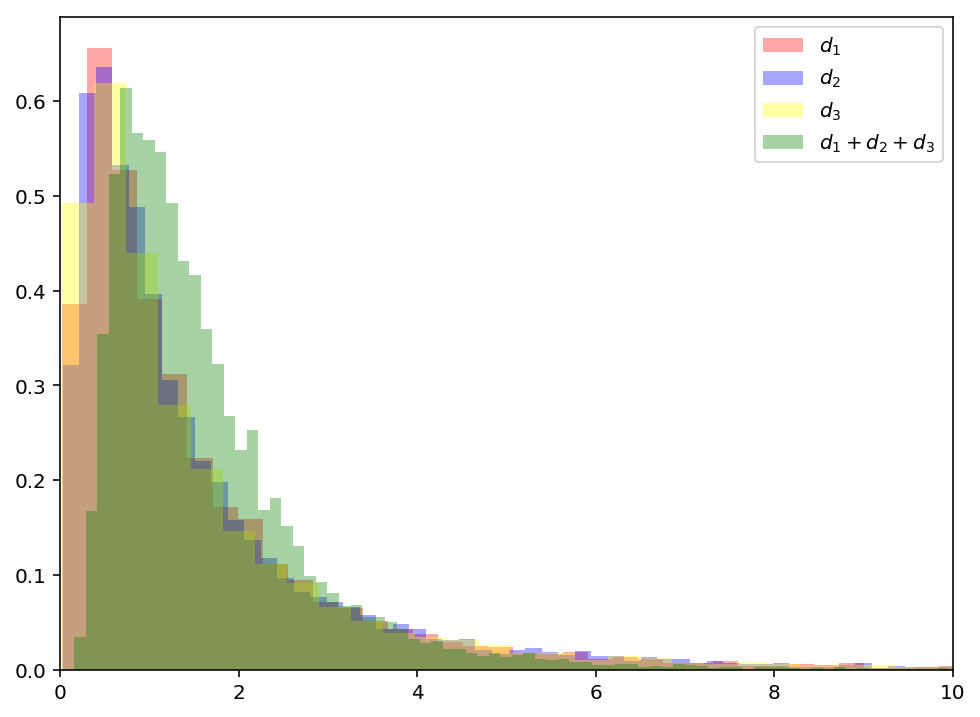

In [16]:
size = 10000
plt.figure(1,figsize=(8,6))
dist1 = np.random.lognormal(0,1,size)
dist2 = np.random.lognormal(0,1,size)
dist3 = np.random.lognormal(0,1,size)
dist = (dist1+dist2+dist3)/3.0
hist = plt.hist(dist1,bins=200,normed=True,edgecolor='none',alpha=0.35,color='red',label='$d_1$')
hist = plt.hist(dist2,bins=200,normed=True,edgecolor='none',alpha=0.35,color='blue',label='$d_2$')
hist = plt.hist(dist3,bins=200,normed=True,edgecolor='none',alpha=0.35,color='yellow',label='$d_3$')
hist = plt.hist(dist,bins=200,normed=True,edgecolor='none',alpha=0.35,color='green',label='$d_1+d_2+d_3$')
plt.xlim(0,10)
leg = plt.legend()


Hmmm. It looks like the peak of the resultant distribution has moved to the right some, but it sure doesn't look Gaussian!

Let's average many, many lognormal distributions and see what happens...

Averaging distributions: 100%|██████████| 100000/100000 [00:39<00:00, 2518.47dists/s]


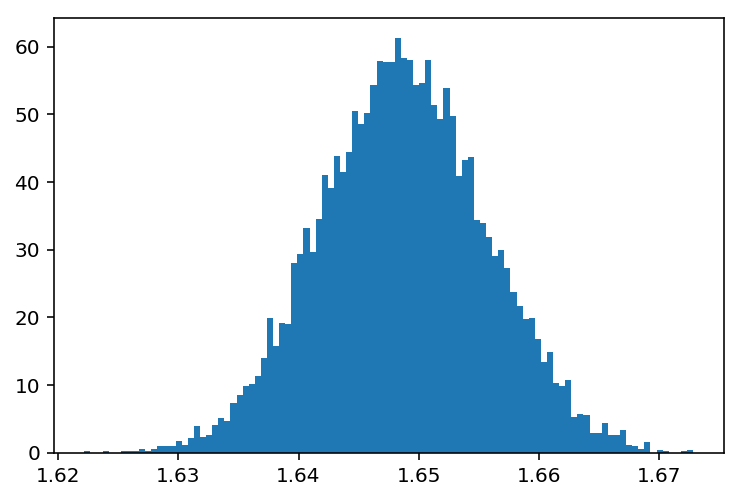

In [17]:
# The size of each distribution
size = 10000

# The number of distributions that we will average
ndist = 100000

# Create an array of zeros and then accumulate the values from each draw.
dist =  np.zeros(size)
pbar = tqdm(desc='Averaging distributions',unit='dists',total=ndist)
for i in range(ndist):
    dist += np.random.lognormal(0,1,size)
    pbar.update(1)
pbar.close()

# Now divide by the number of distributions to find the average values
dist /= np.float(ndist)

# Plot the resultant distribution
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')

Holy moly! It sure looks Gaussian. But is it really?

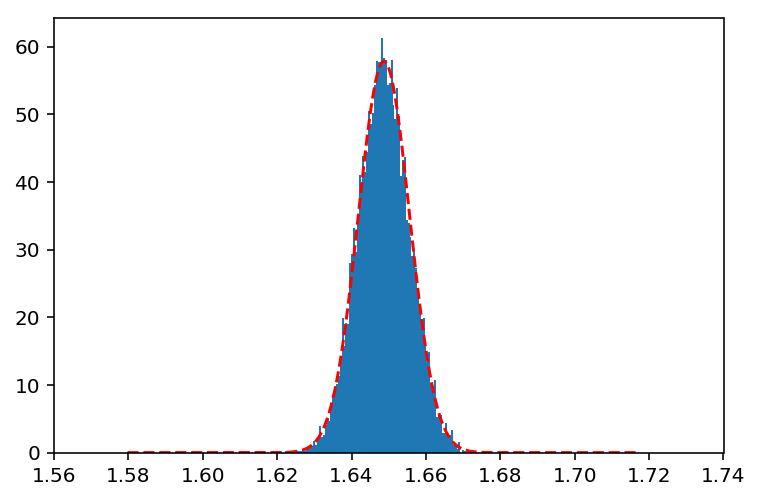

In [18]:
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')
x,y = gauss(x0=np.mean(dist),sig=np.std(dist))
plt.plot(x,y,'r--')
xlim = plt.xlim(1.56,1.74)

## Homework
Demonstrate the CLT with a different distribution and save it in a python script or module. When complete you will push that code to the same directory as this notebook on the repo. Please call your script "YourName_CLT.py". There are many distributions you can choose from <a href="https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html">here</a>. Also, you may (are expected to) copy and edit code from this notebook to commplete this task.



Averaging distributions:   0%|          | 0/100000 [00:00<?, ?dists/s]

Averaging distributions:   0%|          | 334/100000 [00:00<00:29, 3331.71dists/s]

Averaging distributions:   1%|          | 712/100000 [00:00<00:28, 3452.95dists/s]

Averaging distributions:   1%|          | 1083/100000 [00:00<00:28, 3526.00dists/s]

Averaging distributions:   1%|▏         | 1412/100000 [00:00<00:28, 3451.13dists/s]

Averaging distributions:   2%|▏         | 1679/100000 [00:00<00:33, 2935.45dists/s]

Averaging distributions:   2%|▏         | 2007/100000 [00:00<00:32, 3029.75dists/s]

Averaging distributions:   2%|▏         | 2405/100000 [00:00<00:29, 3262.71dists/s]

Averaging distributions:   3%|▎         | 2789/100000 [00:00<00:28, 3414.89dists/s]

Averaging distributions:   3%|▎         | 3136/100000 [00:00<00:28, 3429.94dists/s]

Averaging distributions:   3%|▎         | 3495/100000 [00:01<00:27, 3476.09dists/s]

Averaging distributions:   4%|▍         | 3924/100000 [00:01<00:26, 3685.65dis

Averaging distributions:  35%|███▌      | 35413/100000 [00:09<00:15, 4117.33dists/s]

Averaging distributions:  36%|███▌      | 35849/100000 [00:09<00:15, 4185.92dists/s]

Averaging distributions:  36%|███▋      | 36278/100000 [00:09<00:15, 4215.12dists/s]

Averaging distributions:  37%|███▋      | 36701/100000 [00:09<00:15, 4198.39dists/s]

Averaging distributions:  37%|███▋      | 37129/100000 [00:09<00:14, 4220.37dists/s]

Averaging distributions:  38%|███▊      | 37555/100000 [00:09<00:14, 4229.78dists/s]

Averaging distributions:  38%|███▊      | 37979/100000 [00:09<00:14, 4214.11dists/s]

Averaging distributions:  38%|███▊      | 38401/100000 [00:09<00:14, 4110.82dists/s]

Averaging distributions:  39%|███▉      | 38813/100000 [00:10<00:15, 3869.15dists/s]

Averaging distributions:  39%|███▉      | 39242/100000 [00:10<00:15, 3986.23dists/s]

Averaging distributions:  40%|███▉      | 39644/100000 [00:10<00:15, 3838.68dists/s]

Averaging distributions:  40%|████      | 40032/100000

Averaging distributions:  71%|███████   | 71035/100000 [00:18<00:07, 3898.23dists/s]

Averaging distributions:  71%|███████▏  | 71426/100000 [00:18<00:07, 3754.11dists/s]

Averaging distributions:  72%|███████▏  | 71803/100000 [00:18<00:07, 3708.00dists/s]

Averaging distributions:  72%|███████▏  | 72175/100000 [00:18<00:07, 3685.23dists/s]

Averaging distributions:  73%|███████▎  | 72553/100000 [00:18<00:07, 3711.84dists/s]

Averaging distributions:  73%|███████▎  | 72955/100000 [00:18<00:07, 3798.11dists/s]

Averaging distributions:  73%|███████▎  | 73355/100000 [00:18<00:06, 3854.69dists/s]

Averaging distributions:  74%|███████▍  | 73755/100000 [00:19<00:06, 3896.14dists/s]

Averaging distributions:  74%|███████▍  | 74181/100000 [00:19<00:06, 3998.19dists/s]

Averaging distributions:  75%|███████▍  | 74620/100000 [00:19<00:06, 4107.62dists/s]

Averaging distributions:  75%|███████▌  | 75058/100000 [00:19<00:05, 4183.76dists/s]

Averaging distributions:  75%|███████▌  | 75478/100000

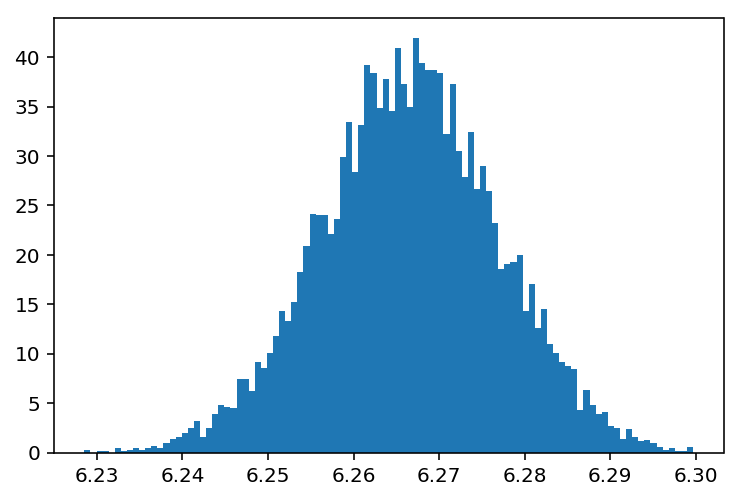

In [25]:
# The size of each distribution
size = 10000

# The number of distributions that we will average
ndist = 100000

# Create an array of zeros and then accumulate the values from each draw.
dist =  np.zeros(size)
pbar = tqdm(desc='Averaging distributions',unit='dists',total=ndist)
for i in range(ndist):
    dist += np.random.rayleigh(5,size)
    pbar.update(1)
pbar.close()

# Now divide by the number of distributions to find the average values
dist /= np.float(ndist)

# Plot the resultant distribution
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')

(array([  0.28113302,   0.        ,   0.14056651,   0.14056651,
          0.        ,   0.42169953,   0.14056651,   0.28113302,
          0.42169953,   0.28113302,   0.42169953,   0.70283255,
          0.42169953,   0.98396557,   1.40566511,   1.54623162,
          1.96793115,   2.53019719,   3.23302974,   1.54623162,
          2.53019719,   3.9358623 ,   4.77926136,   4.63869485,
          4.49812834,   7.45002506,   7.45002506,   6.18492647,
          9.13682319,   8.57455714,  10.12078876,  11.80758689,
         14.33778408,  13.3538185 ,  15.18118314,  18.27364637,
         20.94441007,  24.17743982,  24.03687331,  24.03687331,
         22.06894216,  23.61517378,  29.94066675,  33.45482952,
         28.39443514,  33.17369649,  39.21805645,  38.37465739,
         34.86049462,  37.81239134,  34.5793616 ,  40.90485458,
         37.2501253 ,  35.00106113,  41.88882015,  39.35862296,
         38.65579041,  38.65579041,  38.37465739,  32.18973092,
         37.2501253 ,  30.50293279,  27.